In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('US Tests.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,People Tested
Date,,
2020-03-01,20,341
2020-03-02,14,724
2020-03-03,22,832
2020-03-04,34,967
2020-03-05,74,1303


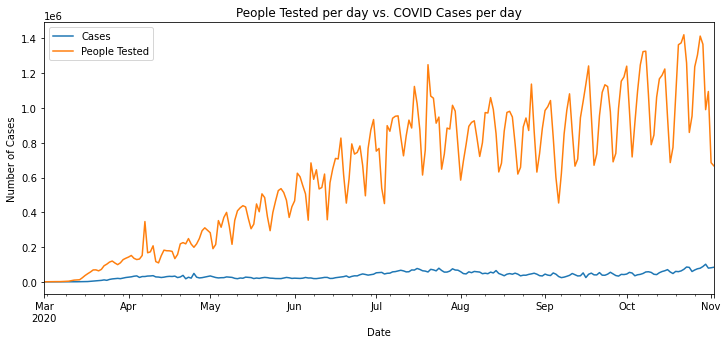

In [2]:
title = 'People Tested per day vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['People Tested'].plot(legend=True);

In [3]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [4]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.238645
p-value                   0.656755
# lags used              13.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [5]:
adf_test(df['People Tested'], title='Tests')

Augmented Dickey-Fuller Test: Tests
ADF test statistic       -1.567020
p-value                   0.500136
# lags used              13.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [6]:
df_transformed = df.diff()

In [7]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['People Tested'], title='TestsFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -2.772410
p-value                   0.062324
# lags used              12.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: TestsFirstDiff
ADF test statistic     -7.318129e+00
p-value                 1.214017e-10
# lags used             1.200000e+01
# observations          2.330000e+02
critical value (1%)    -3.458731e+00
critical value (5%)    -2.874026e+00
critical value (10%)   -2.573424e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [8]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['People Tested'], title='TestsSecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic     -6.486413e+00
p-value                 1.257669e-08
# lags used             1.100000e+01
# observations          2.330000e+02
critical value (1%)    -3.458731e+00
critical value (5%)    -2.874026e+00
critical value (10%)   -2.573424e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: TestsSecondDiff
ADF test statistic     -7.360364e+00
p-value                 9.535889e-11
# lags used             1.500000e+01
# observations          2.290000e+02
critical value (1%)    -3.459233e+00
critical value (5%)    -2.874245e+00
critical value (10%)   -2.573541e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [9]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [10]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  42.76932463631851
BIC:  42.79850338147541

Order = 1
AIC:  42.17135190050053
BIC:  42.259150891415345

Order = 2
AIC:  41.74726138317284
BIC:  41.8940339172841

Order = 3
AIC:  41.60870773433722
BIC:  41.814810701137304

Order = 4
AIC:  41.329224490258134
BIC:  41.595018422208724

Order = 5
AIC:  40.69353592375023
BIC:  41.01938504812124

Order = 6
AIC:  40.06048652196535
BIC:  40.446758813617606

Order = 7
AIC:  39.85655023591915
BIC:  40.30361747105185

Order = 8
AIC:  39.836900448510015
BIC:  40.34513825939432

Order = 9
AIC:  39.80661966366915
BIC:  40.376407594389946

Order = 10
AIC:  39.80603060229383
BIC:  40.43775216552228

Order = 11
AIC:  39.829756453727235
BIC:  40.52379918854726

Order = 12
AIC:  39.831189624012694
BIC:  40.58794515482514

Order = 13
AIC:  39.83497895430836
BIC:  40.65484305083743

Order = 14
AIC:  39.778787925112375
BIC:  40.662160563539125

Order = 15
AIC:  39.81512353911498
BIC:  40.762408964363985

Order = 16
AIC:  39.81993113264154
BIC:

In [11]:
results = model.fit(7)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 28, Nov, 2020
Time:                     15:51:57
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    40.3036
Nobs:                     231.000    HQIC:                   40.0369
Log likelihood:          -5228.98    FPE:                2.04004e+17
AIC:                      39.8566    Det(Omega_mle):     1.79884e+17
--------------------------------------------------------------------
Results for equation Cases
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   67.153868       322.127187            0.208           0.835
L1.Cases                -1.603114         0.063359          -25.302           0.000
L1.People Tested         0.017902         0.0036

In [12]:
lag_order = results.k_ar
lag_order

7

In [13]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[  -2542.63057558,   -5088.79308762],
       [  -2858.82580233, -213694.56778782],
       [   6587.19110348,  -67560.19774491],
       [  -1455.82376944, -181472.15056321],
       [ -12745.60158016, -153702.77486297],
       [  -7701.89667549,  405814.15405988],
       [   8815.50626096,  223310.14771059]])

In [14]:
test

,Cases,People Tested
Date,,
2020-10-27,-2149.0,-215622.0
2020-10-28,-3528.0,40522.0
2020-10-29,6517.0,-155725.0
2020-10-30,3384.0,-328706.0
2020-10-31,-35482.0,480409.0
2020-11-01,24406.0,-514018.0
2020-11-02,815.0,391605.0


In [15]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Tests2d'])
df_forecast

,Cases2d,Tests2d
2020-10-27,-2542.630576,-5088.793088
2020-10-28,-2858.825802,-213694.567788
2020-10-29,6587.191103,-67560.197745
2020-10-30,-1455.823769,-181472.150563
2020-10-31,-12745.601580,-153702.774863
2020-11-01,-7701.896675,405814.154060
2020-11-02,8815.506261,223310.147711


In [16]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [17]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Tests1d'] = (df['People Tested'].iloc[-nobs-1]-df['People Tested'].iloc[-nobs-2]) + df_forecast['Tests2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['TestsForecast'] = df['People Tested'].iloc[-nobs-1] + df_forecast['Tests1d'].cumsum()

In [18]:
df_forecast

,Cases2d,Tests2d,Cases1d,CasesForecast,Tests1d,TestsForecast
2020-10-27,-2542.630576,-5088.793088,6376.369424,74735.369424,278556.206912,1.515317e+06
2020-10-28,-2858.825802,-213694.567788,3517.543622,78252.913047,64861.639125,1.580179e+06
2020-10-29,6587.191103,-67560.197745,10104.734726,88357.647772,-2698.558620,1.577480e+06
2020-10-30,-1455.823769,-181472.150563,8648.910956,97006.558728,-184170.709184,1.393310e+06
2020-10-31,-12745.601580,-153702.774863,-4096.690624,92909.868104,-337873.484047,1.055436e+06
2020-11-01,-7701.896675,405814.154060,-11798.587300,81111.280805,67940.670013,1.123377e+06
2020-11-02,8815.506261,223310.147711,-2983.081039,78128.199766,291250.817724,1.414628e+06


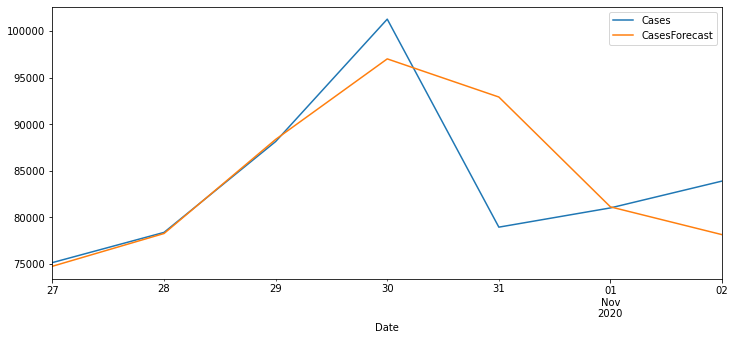

In [19]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);